<a href="https://colab.research.google.com/github/Ferpm7/Regresion-No-Lineal/blob/main/Actividad_6_Regresi%C3%B3n_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fernando Pérez Martínez - A01769688

In [9144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [9145]:
df = pd.read_csv('cuentas_credicel.csv', encoding='latin1')
df

<ipython-input-9145-0007bc6baa22>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv', encoding='latin1')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,8.87,10000,0,97880,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,29.49,5000,0,37295,27.0,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,23.76,4750,0,20210,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,28.56,7000,0,78434,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [9146]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [9147]:
df.head()

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


#Cambiamos la columna folio_solictud ya que esta se puede tomar como una de tipo string o categorica debido a que es un folio o etiqueta que se asigna y no como tal valores numericos.

In [9148]:
# Convertir la columna 'columna_enteros' de int64 a object
df['folio'] = df['folio'].astype(object)

# Verificar el tipo de datos de la columna
print(df['folio'].dtype)

# Convertir la columna 'columna_enteros' de int64 a object
df['folio_solicitud'] = df['folio_solicitud'].astype(object)

# Verificar el tipo de datos de la columna
print(df['folio_solicitud'].dtype)

object
object


In [9149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  object 
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  object 
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [9150]:
conteo_por_columna = df.count()
conteo_por_columna

folio                 22735
tag                   22735
folio_solicitud       22735
fecha                 22735
marca                 22735
modelo                22735
plazo                 22735
precio                22735
enganche              22735
descuento             22735
semana                22735
monto_financiado      22735
costo_total           22735
monto_accesorios      22735
agente_venta          22735
dis_venta             22735
status                22735
fraude                22735
empresa               22722
inversion             22735
pagos_realizados      22735
reautorizacion        22735
fecha_ultimo_pago     19379
fecha_pago_proximo    19379
status_cuenta         19421
puntos                22735
riesgo                22735
score_buro            22735
razones_buro          15395
porc_eng              22735
limite_credito        22735
semana_actual         22735
cp_cliente            15492
edad_cliente          22726
cd_cliente            22735
edo_cliente         

In [9151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  object 
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  object 
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [9152]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
e

In [9153]:
#Identificar valores nulos por dataframe
valores_nulos=df.isnull().sum().sum()
valores_nulos

24639

In [9154]:
# Obtén las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Obtén las columnas categóricas
df_categoric = df.select_dtypes(include=['object'])

# Ahora 'df_numeric' contiene solo las columnas numéricas y 'df_categoric' contiene solo las columnas categóricas


In [9155]:
df_numeric

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0,0,0,0.00,0,40.02,26,23.0
1,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0,0,0,0.00,0,35.01,13,60.0
2,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0,0,0,0.00,0,25.01,74,58.0
3,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0,0,0,0.00,0,25.01,13,42.0
4,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0,0,0,0.00,0,25.01,74,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,0,0,0,0,10,27.40,469,8.87,0,22.0
22731,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,0,0,0,0,9,19.00,502,29.49,0,27.0
22732,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,0,0,0,0,11,26.65,459,23.76,0,36.0
22733,9799.0,2799.0,0.0,386,7000.0,15054,0.0,1,0,0,0,0,14,-17.35,699,28.56,0,53.0


In [9156]:
# Itera a través de las columnas del DataFrame
for columna in df_numeric.columns:
    if df_numeric[columna].isnull().any():
        # Verifica si la columna tiene valores nulos
        if pd.api.types.is_numeric_dtype(df_numeric[columna]):  # Verifica si la columna es numérica
            if pd.api.types.is_integer_dtype(df_numeric[columna]):  # Verifica si la columna es de tipo int64
                promedio = df_numeric[columna].mean()
                df_numeric[columna] = df_numeric[columna].fillna(round(promedio))
            else:
                promedio = df_numeric[columna].mean()
                df_numeric[columna] = df_numeric[columna].fillna(round(promedio, 1))

In [9157]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            22735 non-null  float64
 1   enganche          22735 non-null  float64
 2   descuento         22735 non-null  float64
 3   semana            22735 non-null  int64  
 4   monto_financiado  22735 non-null  float64
 5   costo_total       22735 non-null  int64  
 6   monto_accesorios  22735 non-null  float64
 7   status            22735 non-null  int64  
 8   fraude            22735 non-null  int64  
 9   inversion         22735 non-null  int64  
 10  pagos_realizados  22735 non-null  int64  
 11  reautorizacion    22735 non-null  int64  
 12  puntos            22735 non-null  int64  
 13  riesgo            22735 non-null  float64
 14  score_buro        22735 non-null  int64  
 15  porc_eng          22735 non-null  float64
 16  semana_actual     22735 non-null  int64 

In [9158]:
#Identificar valores nulos por columna
valores_nulos=df_numeric.isnull().sum()
valores_nulos

precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
semana_actual       0
edad_cliente        0
dtype: int64

In [9159]:
df_categoric

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,empresa,...,fecha_pago_proximo,status_cuenta,razones_buro,limite_credito,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,...,NaN,NaN,NaN,5000,NaN,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,...,NaN,NaN,NaN,6000,NaN,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,...,NaN,Cancelado,NaN,0,NaN,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,...,NaN,NaN,NaN,7000,NaN,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,...,12/03/22 0:00,Mora,NaN,7000,NaN,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",10000,97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",5000,37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,NaN,...,25/04/23 0:00,NaN,"K0,D7,F7,D8",4750,20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,...,25/04/23 0:00,NaN,"J0,G1,E0,E2",7000,78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [9160]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   folio               22735 non-null  object
 1   tag                 22735 non-null  object
 2   folio_solicitud     22735 non-null  object
 3   fecha               22735 non-null  object
 4   marca               22735 non-null  object
 5   modelo              22735 non-null  object
 6   plazo               22735 non-null  object
 7   agente_venta        22735 non-null  object
 8   dis_venta           22735 non-null  object
 9   empresa             22722 non-null  object
 10  fecha_ultimo_pago   19379 non-null  object
 11  fecha_pago_proximo  19379 non-null  object
 12  status_cuenta       19421 non-null  object
 13  razones_buro        15395 non-null  object
 14  limite_credito      22735 non-null  object
 15  cp_cliente          15492 non-null  object
 16  cd_cliente          22

In [9161]:
#Identificar valores nulos por columna
valores_nulos=df_categoric.isnull().sum()
valores_nulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
agente_venta             0
dis_venta                0
empresa                 13
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
razones_buro          7340
limite_credito           0
cp_cliente            7243
cd_cliente               0
edo_cliente              8
cd_venta                 0
edo_venta                0
curp                     0
dtype: int64

In [9162]:
# Itera a través de las columnas del DataFrame
for columna in df_categoric.columns:
    if df_categoric[columna].isnull().any():
        # Verifica si la columna tiene valores nulos
        df_categoric[columna] = df_categoric[columna].bfill()


In [9163]:
#Corroboramos valores nulos
valores_nulos=df_numeric.isnull().sum()
valores_nulos

precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
semana_actual       0
edad_cliente        0
dtype: int64

In [9164]:
#Corroboramos valores nulos
valores_nulos=df_categoric.isnull().sum()
valores_nulos

folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
agente_venta           0
dis_venta              0
empresa                0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta         35
razones_buro           0
limite_credito         0
cp_cliente             0
cd_cliente             0
edo_cliente            0
cd_venta               0
edo_venta              0
curp                   0
dtype: int64

<Figure size 1500x800 with 0 Axes>

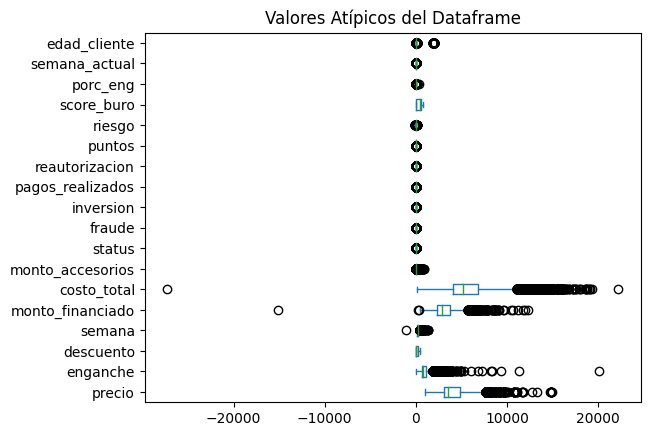

In [9165]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_numeric.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [9166]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_numeric
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido precio               8081.558082
enganche             2356.496845
descuento             478.215020
semana                541.287392
monto_financiado     6366.317810
costo_total         12857.588246
monto_accesorios      191.260880
status                  2.611178
fraude                  0.864131
inversion               1.511599
pagos_realizados       39.306132
reautorizacion          0.578086
puntos                 48.354233
riesgo                 58.456322
score_buro           1142.021000
porc_eng               45.711306
semana_actual          64.380898
edad_cliente          422.315244
dtype: float64
Limite inferior permitido precio               -87.484900
enganche            -503.622066
descuento           -321.263535
semana               -65.792692
monto_financiado    -214.044583
costo_total        -1458.203597
monto_accesorios    -164.333344
status                -0.100423
fraude                -0.714494
inversion             -1.038408
pagos_realizados   

In [9167]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df_numeric= df_numeric[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_numeric

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,40.02,26.0,23.0
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,35.01,13.0,60.0
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0,0.0,0.0,0.0,0.00,0,25.01,NaN,58.0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,13.0,42.0
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,NaN,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0,0.0,0.0,10.0,27.40,469,8.87,0.0,22.0
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0,0.0,0.0,9.0,19.00,502,29.49,0.0,27.0
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0,0.0,0.0,11.0,26.65,459,23.76,0.0,36.0
22733,NaN,NaN,0.0,386.0,NaN,NaN,0.0,1.0,0.0,0,0.0,0.0,14.0,-17.35,699,28.56,0.0,53.0


In [9168]:
#Corroboramos valores nulos del dataframe4
valores_nulos=df_numeric.isnull().sum()
valores_nulos

precio               110
enganche             292
descuento             17
semana               362
monto_financiado     182
costo_total          290
monto_accesorios     617
status               154
fraude              1701
inversion              0
pagos_realizados     184
reautorizacion       774
puntos                 3
riesgo                65
score_buro             0
porc_eng             275
semana_actual        178
edad_cliente          99
dtype: int64

In [9169]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=df_numeric.copy()
data_clean_num=data_clean.fillna(round(df_numeric.mean(),1))
data_clean_num

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,40.02,26.0,23.0
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,35.01,13.0,60.0
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0.0,0,0.0,0.0,0.0,0.00,0,25.01,20.2,58.0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,13.0,42.0
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,20.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0,0.0,0.0,10.0,27.40,469,8.87,0.0,22.0
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0,0.0,0.0,9.0,19.00,502,29.49,0.0,27.0
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0,0.0,0.0,11.0,26.65,459,23.76,0.0,36.0
22733,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0.0,0,0.0,0.0,14.0,-17.35,699,28.56,0.0,53.0


In [9170]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_num.isnull().sum()
valores_nulos

precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
semana_actual       0
edad_cliente        0
dtype: int64

<Figure size 1500x800 with 0 Axes>

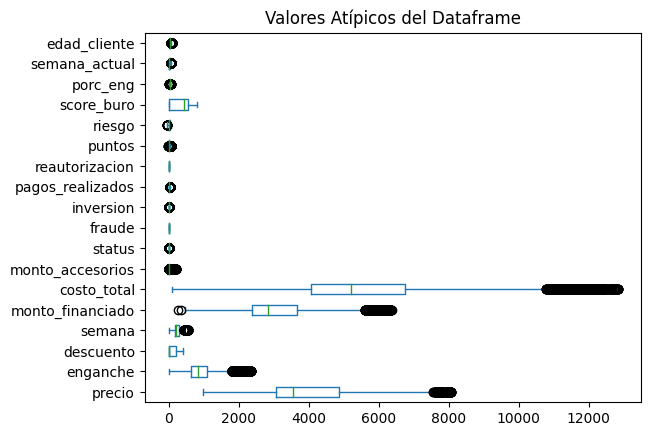

In [9171]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_clean_num.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [9172]:
# Unión por columnas
Base_limpia = pd.concat([data_clean_num, df_categoric], axis=1)
Base_limpia

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,...,fecha_pago_proximo,status_cuenta,razones_buro,limite_credito,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,...,12/03/22 0:00,Cancelado,C1,5000,72490,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,...,12/03/22 0:00,Cancelado,C1,6000,72490,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0.0,0,...,12/03/22 0:00,Cancelado,C1,0,72490,TANTOYUCA,VER.,0,0,0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,...,12/03/22 0:00,Mora,C1,7000,72490,AMXTLAN PUE,VER.,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,...,12/03/22 0:00,Mora,C1,7000,72490,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",10000,97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",5000,37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0,...,25/04/23 0:00,NaN,"K0,D7,F7,D8",4750,20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0.0,0,...,25/04/23 0:00,NaN,"J0,G1,E0,E2",7000,78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [9173]:
#Identificar valores nulos por columna
valores_nulos=Base_limpia.isnull().sum()
valores_nulos

precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
status                 0
fraude                 0
inversion              0
pagos_realizados       0
reautorizacion         0
puntos                 0
riesgo                 0
score_buro             0
porc_eng               0
semana_actual          0
edad_cliente           0
folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
agente_venta           0
dis_venta              0
empresa                0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta         35
razones_buro           0
limite_credito         0
cp_cliente             0
cd_cliente             0
edo_cliente            0
cd_venta               0
edo_venta              0
curp                   0
dtype: int64

In [9174]:
#Identificar valores nulos por dataframe
valores_nulos=Base_limpia.isnull().sum().sum()
valores_nulos

35

In [9175]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#Filtro por columnas
Base_limpia["status_cuenta"] =Base_limpia["status_cuenta"].fillna(method="ffill")

In [9176]:
#Identificar valores nulos por columna
valores_nulos=Base_limpia.isnull().sum()
valores_nulos

precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
status                0
fraude                0
inversion             0
pagos_realizados      0
reautorizacion        0
puntos                0
riesgo                0
score_buro            0
porc_eng              0
semana_actual         0
edad_cliente          0
folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
empresa               0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
razones_buro          0
limite_credito        0
cp_cliente            0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [9177]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(Base_limpia)

In [9178]:
#Identificar valores nulos por dataframe
valores_nulos=Base_limpia.isnull().sum().sum()
valores_nulos

0

#Podemos ver que la correlación en la mayoria de las variables es practicamente nula, en su mayoria, a simple vista pareciera no haber ninguna correlacion fuerte, a excepcion de algunas

In [9179]:
coef = pd.DataFrame(columns=['Variable', 'Modelo', 'Determinación', 'Correlación'])

#Modelos

In [9180]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
df1 = df[df['score_buro'] != 0]
Vars_Indep= df1[['score_buro']]
Var_Dep= df1['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9181]:
def  func1 (x, a, b, c):
     return a*x**10 + b*x + c

In [9182]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['score_buro'], df1['riesgo'])

In [9183]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.44654117e-21, -1.98424556e-01,  1.16832244e+02])

In [9184]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['score_buro'], df1['riesgo'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**10 + b*x + c

In [9185]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,score_buro
7235,-3.017128
7236,-14.530860
7239,-19.693268
7240,-20.483123
7241,-12.536239
...,...
22728,21.189875
22730,23.779218
22731,17.210050
22732,25.747848


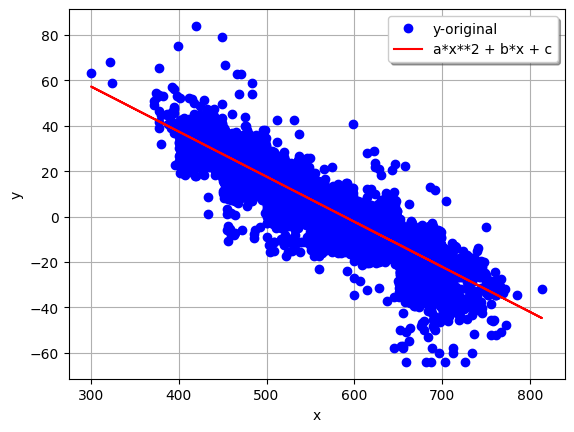

In [9186]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9187]:
R2 = r2_score(y, yfit1)
R2

0.840639458522922

In [9188]:
corr= np.sqrt(abs(R2))
print(corr)
coef.loc[0] = ['Riesgo', 'Modelo 1', round(R2,2), round(corr,2)]

0.9168639258488263


#2

In [9189]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df1[['edad_cliente']]
Var_Dep= df1['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9190]:
def  func1 (x, a, b):
     return a*np.log(x) + b

In [9191]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['edad_cliente'], df1['riesgo'])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [9192]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1., 1.])

In [9193]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['edad_cliente'], df1['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b

In [9194]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,edad_cliente
7235,3.890372
7236,4.433987
7239,5.025352
7240,4.218876
7241,4.555348
...,...
22728,4.688879
22730,4.091042
22731,4.295837
22732,4.583519


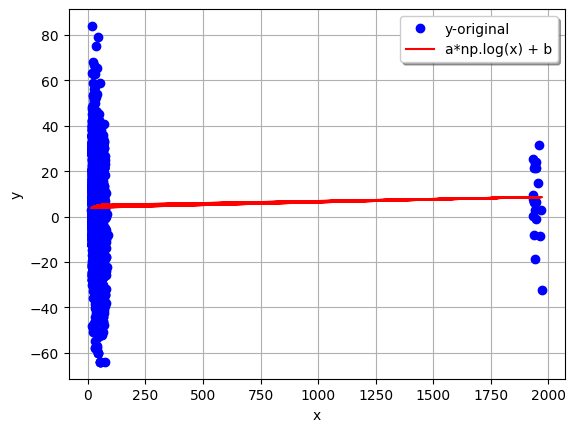

In [9195]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9196]:
y = y.fillna(0)  # Reemplazar NaN por cero en el vector y
yfit1 = yfit1.fillna(0)  # Reemplazar NaN por cero en el vector yfit1
R2 = r2_score(y, yfit1)  # Calcular el coeficiente de determinación
corr = np.sqrt(abs(R2))


In [9197]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[1] = ['Riesgo', 'Modelo 2', round(R2,2), round(corr,2)]

#3

In [9198]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df1[['puntos']]
Var_Dep= df1['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9199]:
def  func1 (x, a, b, c):
     return (a*x**5 + b)/ c*x

In [9200]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['puntos'], df1['riesgo'])

In [9201]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-4.06368569e-05,  1.86462928e+01,  1.46578372e+01])

In [9202]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['puntos'], df1['riesgo'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =(a*x**5 + b)/ c*x

In [9203]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,puntos
7235,9.975588
7236,-12.497397
7239,-151.989202
7240,-45.292354
7241,-71.396386
...,...
22728,9.081732
22730,9.948676
22731,9.975588
22732,9.081732


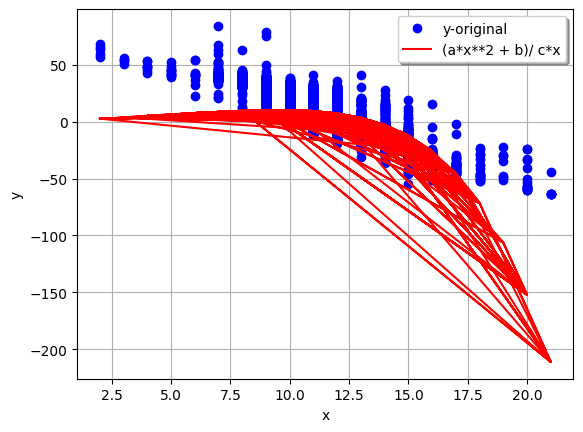

In [9204]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9205]:
R2 = r2_score(y, yfit1)
R2

0.30448630934600607

In [9206]:
corr= np.sqrt(abs(R2))
print(corr)
coef.loc[2] = ['Riesgo', 'Modelo 3', round(R2,2), round(corr,2)]

0.5518027812053923


#4

In [9207]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df1[['semana']]
Var_Dep= df1['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9208]:
def  func1 (x, a):
     return 1/a*x**10

In [9209]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['semana'], df1['riesgo'])

In [9210]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([5.92106924e+23])

In [9211]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['semana'], df1['riesgo'])
a = parametros[ 0 ]
yfit1 = 1/a*x**10

In [9212]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,semana
7235,0.000011
7236,0.000012
7239,-0.000012
7240,0.000013
7241,-0.000008
...,...
22728,-0.000007
22730,0.000003
22731,0.000004
22732,0.000000


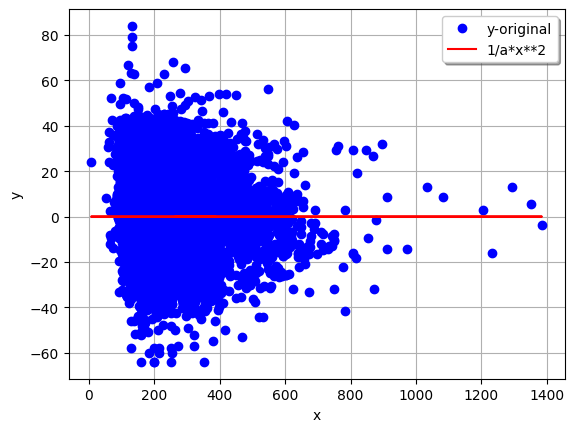

In [9213]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x**2", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9214]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coef.loc[3] = ['Riesgo', 'Modelo 4', round(R2,2), round(corr,2)]

-0.13149882818162495
0.36262767156082415


#5

In [9215]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df1[['monto_financiado']]
Var_Dep= df1['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9216]:
def  func1 (x, a, b):
     return a*np.tan(x) + b

In [9217]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['monto_financiado'], df1['riesgo'])

In [9218]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-6.17150086e-04,  6.70988672e+00])

In [9219]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['monto_financiado'], df1['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b

In [9220]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,monto_financiado
7235,6.709349
7236,6.707077
7239,6.709532
7240,6.708437
7241,6.709664
...,...
22728,6.709719
22730,6.699121
22731,6.709329
22732,6.710360


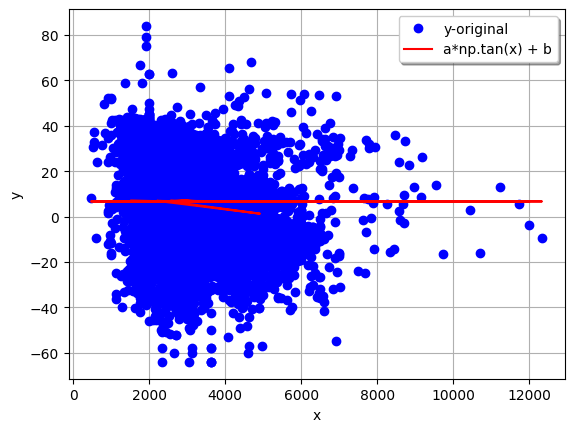

In [9221]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9222]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[4] = ['Riesgo', 'Modelo 5', round(R2,2), round(corr,2)]

#SCORE_BURO

#1

In [9223]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
df2 = df[df['score_buro'] != 0]
Vars_Indep= df2[['puntos']]
Var_Dep= df2['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9224]:
def  func1 (x, a, b, c):
     return a/b*x**2 + c*x

In [9225]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df2['puntos'], df2['score_buro'])

In [9226]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-94.83428095,  77.83471776,  62.76507948])

In [9227]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df2['puntos'], df2['score_buro'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x

In [9228]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,puntos
7235,466.194836
7236,667.334860
7239,767.939221
7240,714.887040
7241,735.007912
...,...
22728,542.988758
22730,505.810203
22731,466.194836
22732,542.988758


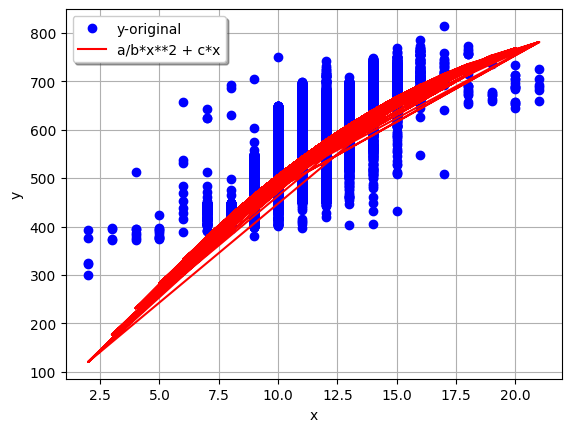

In [9229]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c*x", c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9230]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[5] = ['Score_buro', 'Modelo 1', round(R2,2), round(corr,2)]

#2

In [9231]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
#df1 = df[df['score_buro'] > 0]
Vars_Indep= df2[['precio']]
Var_Dep= df2['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9232]:
def  func1 (x, a, b):
     return a*np.log(x) + b

In [9233]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df2['precio'], df2['score_buro'])

In [9234]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 19.44255102, 394.23806212])

In [9235]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df2['precio'], df2['score_buro'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b

In [9236]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,precio
7235,560.404948
7236,568.352310
7239,539.298420
7240,555.732270
7241,565.521367
...,...
22728,552.893799
22730,552.041915
22731,555.975633
22732,559.237811


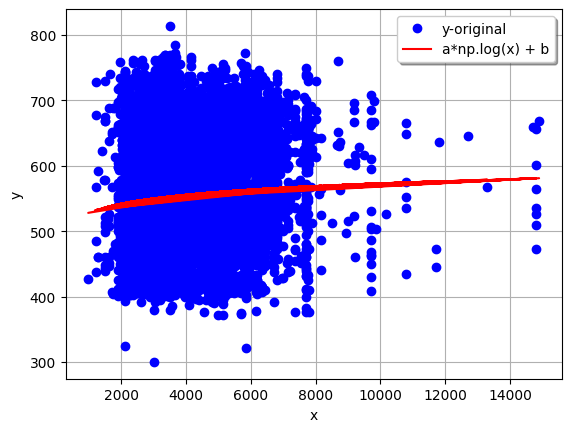

In [9237]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9238]:
y = y.fillna(0)  # Reemplazar NaN por cero en el vector y
yfit1 = yfit1.fillna(0)  # Reemplazar NaN por cero en el vector yfit1
R2 = r2_score(y, yfit1)  # Calcular el coeficiente de determinación
corr = np.sqrt(abs(R2))


In [9239]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[6] = ['Score_buro', 'Modelo 2', round(R2,2), round(corr,2)]

#3

In [9240]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df2[['puntos']]
Var_Dep= df2['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9241]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [9242]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df2['puntos'], df2['score_buro'])

In [9243]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-3.57245258e+01,  4.22229882e+04,  7.67469280e+02])

In [9244]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df2['puntos'], df2['score_buro'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =(a*x**2 + b)/ c*x

In [9245]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,puntos
7235,461.208968
7236,668.136905
7239,727.929538
7240,706.577083
7241,718.814900
...,...
22728,543.218520
22730,503.610199
22731,461.208968
22732,543.218520


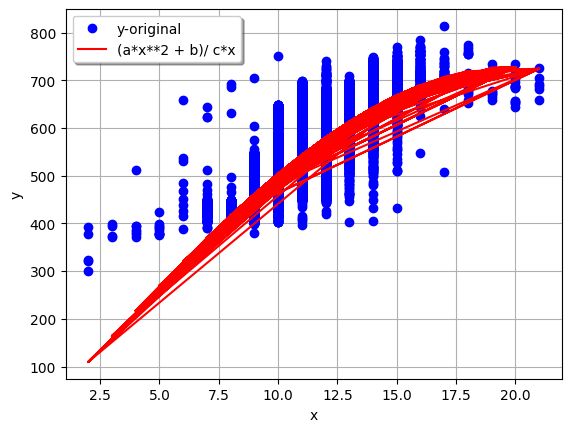

In [9246]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9247]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[7] = ['Score_buro', 'Modelo 3', round(R2,2), round(corr,2)]

#4

In [9248]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df2[['enganche']]
Var_Dep= df2['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9249]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [9250]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df2['enganche'], df2['score_buro'])

In [9251]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 9.43519955e-06, -7.90123226e-02,  6.20765777e+02])

In [9252]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df2['enganche'], df2['score_buro'])
a, b ,c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c

In [9253]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,enganche
7235,558.416776
7236,561.495493
7239,590.670479
7240,588.180792
7241,559.103973
...,...
22728,593.977796
22730,598.131386
22731,539.031130
22732,542.265072


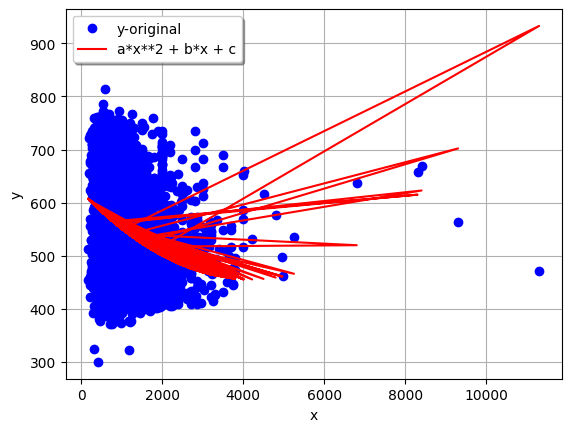

In [9254]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9255]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[8] = ['Score_buro', 'Modelo 4', round(R2,2), round(corr,2)]

#5

In [9256]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df2[['monto_financiado']]
Var_Dep= df2['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9257]:
def  func1 (x, a, b):
     return a*np.tan(x) + b

In [9258]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df2['monto_financiado'], df2['score_buro'])

In [9259]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.38892634e-03, 5.54983265e+02])

In [9260]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df2['monto_financiado'], df2['score_buro'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b

In [9261]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,monto_financiado
7235,554.984476
7236,554.989588
7239,554.984063
7240,554.986529
7241,554.983765
...,...
22728,554.983643
22730,555.007494
22731,554.984520
22732,554.982199


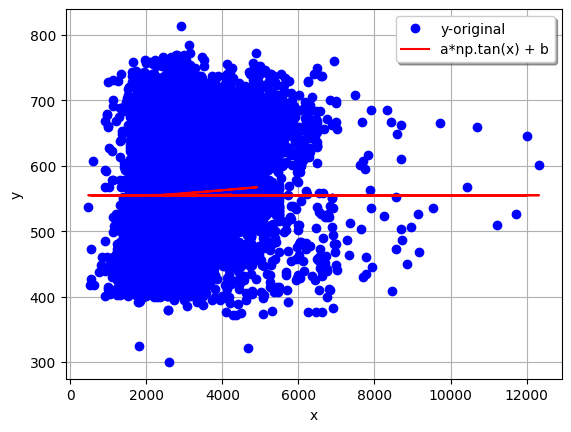

In [9262]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9263]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[9] = ['Score_buro', 'Modelo 5', round(R2,2), round(corr,2)]

#Variable porc_eng

In [9264]:
##Declaramos las variables dependientes e independientes para la regresión No lineal
df3 = df[df['enganche'] != 0]
Vars_Indep= df3[['enganche']]
Var_Dep= df3['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9265]:
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

In [9266]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df3['enganche'], df3['porc_eng'])

In [9267]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-99.99470117, 100.00534489,  13.34689607])

In [9268]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df3['enganche'], df3['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

In [9269]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,enganche
0,21.649003
1,24.522809
2,18.562322
3,18.562322
4,24.788903
...,...
22730,16.508083
22731,26.215162
22732,25.608470
22733,43.138688


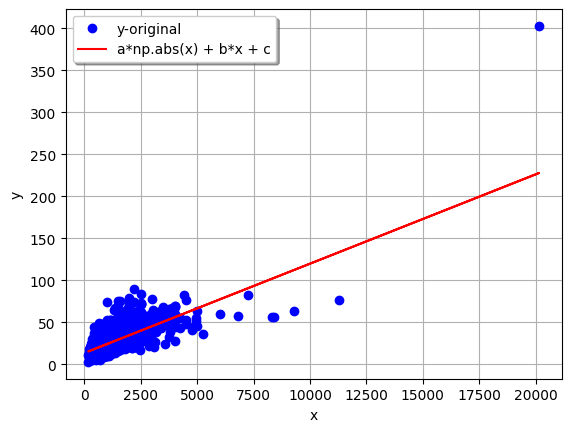

In [9270]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9271]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[10] = ['Porc_eng', 'Modelo 1', round(R2,2), round(corr,2)]

#2

In [9272]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
#df1 = df[df['score_buro'] > 0]
Vars_Indep= df3[['precio']]
Var_Dep= df3['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9273]:
def  func1 (x, a, b):
     return a*np.log(x) + b

In [9274]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df3['precio'], df3['porc_eng'])

In [9275]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-0.66029029, 28.64786398])

In [9276]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df3['precio'], df3['porc_eng'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b

In [9277]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,precio
0,23.646118
1,23.361557
2,23.642738
3,23.642738
4,23.123784
...,...
22730,23.288673
22731,23.155079
22732,23.044292
22733,22.579773


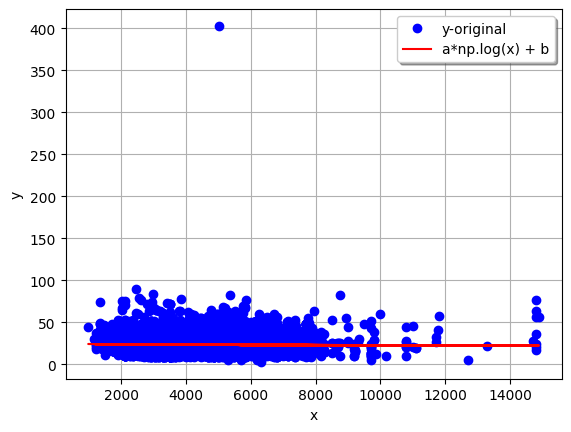

In [9278]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9279]:
y = y.fillna(0)  # Reemplazar NaN por cero en el vector y
yfit1 = yfit1.fillna(0)  # Reemplazar NaN por cero en el vector yfit1
R2 = r2_score(y, yfit1)  # Calcular el coeficiente de determinación
print(R2)

corr = np.sqrt(abs(R2))
print(corr)


0.0008486325103477244
0.029131297780011868


In [9280]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coef.loc[11] = ['Porc_eng', 'Modelo 2', round(R2,2), round(corr,2)]

0.0008486325103477244
0.029131297780011868


#3

In [9281]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df3[['puntos']]
Var_Dep= df3['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9282]:
def  func1 (x, a, b, c):
     return a*x**5 + b*x + c

In [9283]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df3['puntos'], df3['porc_eng'])

In [9284]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 5.88900739e-09, -2.58399318e-01,  2.67662432e+01])

In [9285]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df3['puntos'], df3['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =a*x**5 + b*x + c

In [9286]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,puntos
0,26.766243
1,26.766243
2,26.766243
3,26.766243
4,26.766243
...,...
22730,24.182839
22731,24.440997
22732,23.924799
22733,23.151820


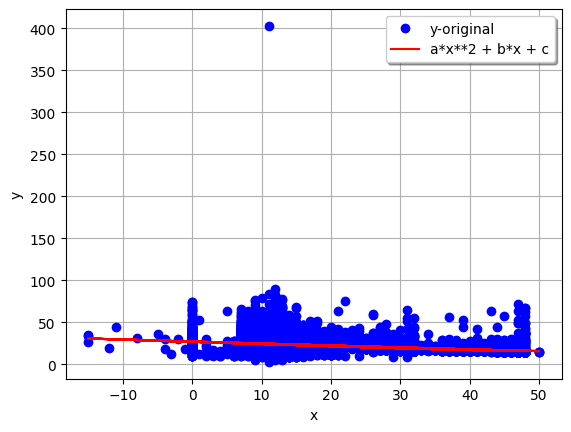

In [9287]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9288]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[12] = ['Porc_eng', 'Modelo 3', round(R2,2), round(corr,2)]

#4

In [9289]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df3[['enganche']]
Var_Dep= df3['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9290]:
def  func1 (x, a, b, c):
     return (a*x**4 + b)/ c*x

In [9291]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df3['enganche'], df3['porc_eng'])

In [9292]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.19499209e-16,  1.46957744e+02,  6.65372493e+03])

In [9293]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df3['enganche'], df3['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**4 + b)/ c*x

In [9294]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,enganche
0,17.227494
1,23.190841
2,10.822403
3,10.822403
4,23.743002
...,...
22730,6.559702
22731,26.702577
22732,25.443655
22733,61.817133


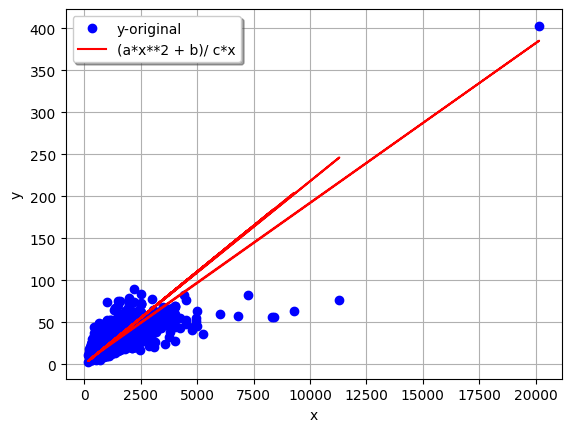

In [9295]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9296]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coef.loc[13] = ['Porc_eng', 'Modelo 4', round(R2,2), round(corr,2)]

-0.2024901649591324
0.44998907204412464


#5

In [9297]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df3[['pagos_realizados']]
Var_Dep= df3['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9298]:
def  func1 (x, a, b):
     return a*np.tan(x) + b

In [9299]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df3['pagos_realizados'], df3['porc_eng'])

In [9300]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-2.73831172e-03,  2.31857338e+01])

In [9301]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df3['pagos_realizados'], df3['porc_eng'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b

In [9302]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,pagos_realizados
0,23.185734
1,23.185734
2,23.185734
3,23.185734
4,23.185734
...,...
22730,23.185734
22731,23.185734
22732,23.185734
22733,23.185734


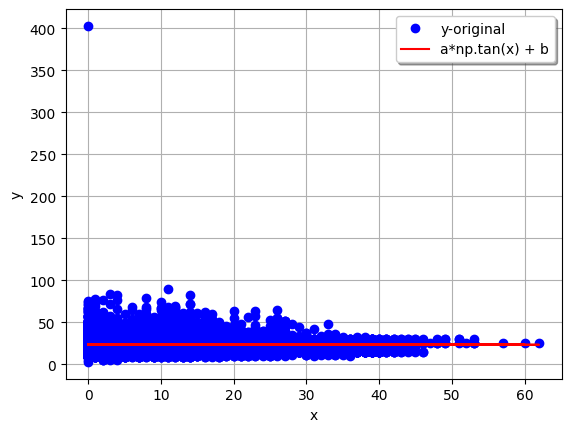

In [9303]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9304]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coef.loc[14] = ['Porc_eng', 'Modelo 5', round(R2,2), round(corr,2)]

0.00022890037591338785
0.015129453919867294


#Variable limite_credito

In [9305]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
df4 = df[df['score_buro'] != 0]
Vars_Indep= df4[['score_buro']]
Var_Dep= df4['limite_credito']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9306]:
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

In [9307]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df4['score_buro'], df4['limite_credito'])

In [9308]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([  106.43250777,   -93.5676508 , -1706.91164279])

In [9309]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df4['score_buro'], df4['limite_credito'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

In [9310]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,score_buro
7235,6063.461972
7236,6809.623676
7239,7144.109958
7240,7195.569386
7241,6680.975107
...,...
22728,4493.949420
22730,4326.706280
22731,4751.246560
22732,4198.057710


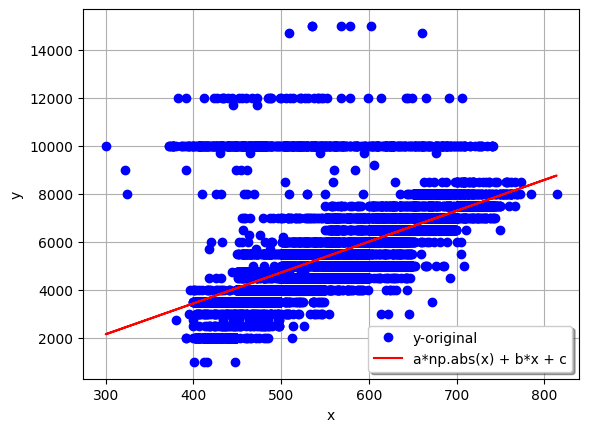

In [9311]:
x = x.astype(float)  # Convertir x a tipo float
y = y.astype(float)  # Convertir y a tipo float

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c", c = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9312]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[15] = ['limite_credito', 'Modelo 1', round(R2,2), round(corr,2)]

#2

In [9313]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df4[['edad_cliente']]
Var_Dep= df4['limite_credito']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9314]:
def  func1 (x, a, b):
     return a*np.log(x) + b

In [9315]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df4['edad_cliente'], df4['limite_credito'])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [9316]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1., 1.])

In [9317]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df4['edad_cliente'], df4['limite_credito'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b

In [9318]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,edad_cliente
7235,3.890372
7236,4.433987
7239,5.025352
7240,4.218876
7241,4.555348
...,...
22728,4.688879
22730,4.091042
22731,4.295837
22732,4.583519


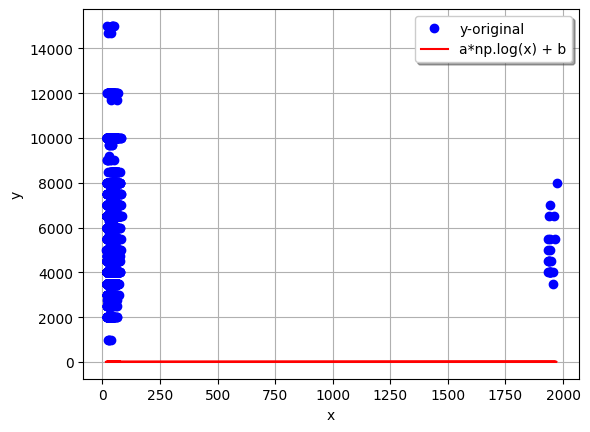

In [9319]:
x = x.astype(float)  # Convertir x a tipo float
y = y.astype(float)  # Convertir y a tipo float

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9320]:
y = y.fillna(0)  # Reemplazar NaN por cero en el vector y
yfit1 = yfit1.fillna(0)  # Reemplazar NaN por cero en el vector yfit1
R2 = r2_score(y, yfit1)  # Calcular el coeficiente de determinación
corr = np.sqrt(abs(R2))


In [9321]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[16] = ['limite_credito', 'Modelo 2', round(R2,2), round(corr,2)]

In [9322]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df4[['puntos']]
Var_Dep= df4['limite_credito']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9323]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [9324]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df4['puntos'], df4['limite_credito'])

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([  31.91790787, -216.05071605, 3612.96294601])

In [9325]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df4['puntos'], df4['limite_credito'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =a*x**2 + b*x + c

In [9326]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,puntos
7235,4253.857039
7236,7553.731476
7239,12059.111772
7240,9164.376147
7241,10065.452206
...,...
22728,5098.471921
22730,4644.246572
22731,4253.857039
22732,5098.471921


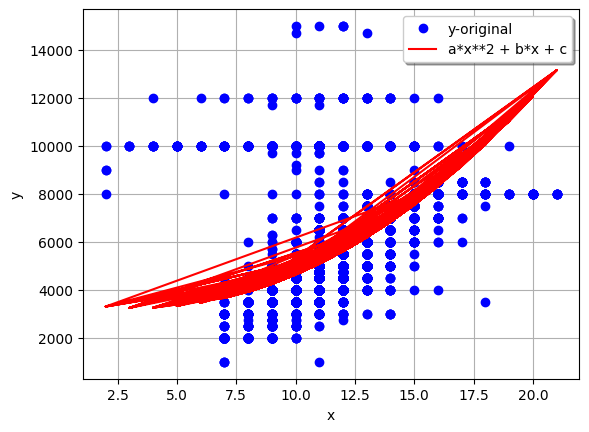

In [9327]:
x = x.astype(float)  # Convertir x a tipo float
y = y.astype(float)  # Convertir y a tipo float


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9328]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[17] = ['limite_credito', 'Modelo 3', round(R2,2), round(corr,2)]

#4

In [9329]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df4[['enganche']]
Var_Dep= df4['limite_credito']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9330]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [9331]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df4['puntos'], df4['limite_credito'])

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([3.01573282e+00, 4.90017139e+03, 1.12367134e+01])

In [9332]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df4['enganche'], df4['limite_credito'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x

In [9333]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,enganche
7235,4000.212741
7236,3782.002783
7239,1828.364219
7240,1987.615276
7241,3951.288972
...,...
22728,1618.808154
22730,1358.786144
22731,5435.763346
22732,5188.398865


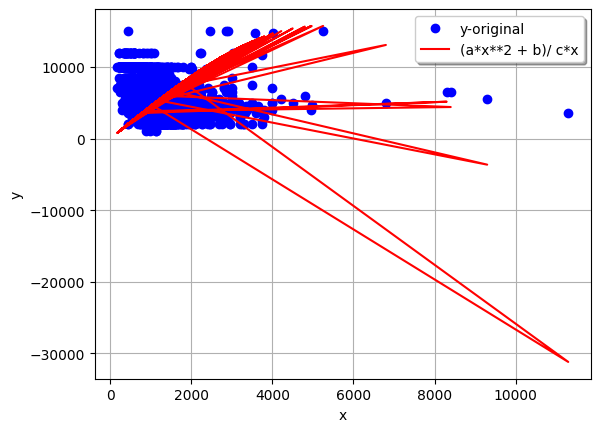

In [9334]:
x = x.astype(float)  # Convertir x a tipo float
y = y.astype(float)  # Convertir y a tipo float


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9335]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[18] = ['limite_credito', 'Modelo 4', round(R2,2), round(corr,2)]

#5

In [9336]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df4[['monto_financiado']]
Var_Dep= df4['limite_credito']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [9337]:
def  func1 (x, a, b):
     return a*np.tan(x) + b

In [9338]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df4['puntos'], df4['limite_credito'])

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([3.13302652e+00, 5.62820073e+03])

In [9339]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df4['monto_financiado'], df4['limite_credito'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b

In [9340]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,monto_financiado
7235,5432.957382
7236,5433.405534
7239,5432.921158
7240,5433.137323
7241,5432.895037
...,...
22728,5432.884335
22730,5434.975328
22731,5432.961211
22732,5432.757744


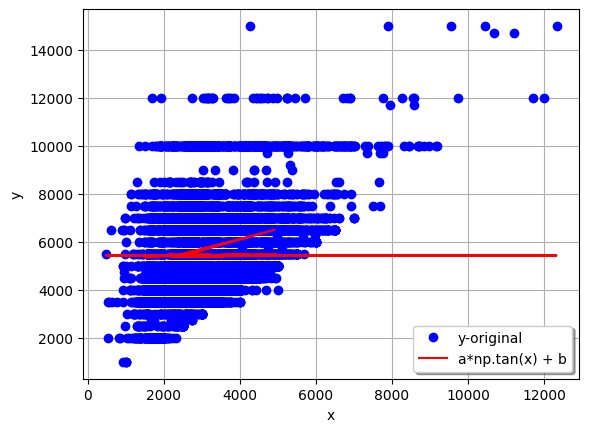

In [9341]:
x = x.astype(float)  # Convertir x a tipo float
y = y.astype(float)  # Convertir y a tipo float


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9342]:
R2 = r2_score(y, yfit1)
corr= np.sqrt(abs(R2))
coef.loc[19] = ['limite_credito', 'Modelo 5', round(R2,2), round(corr,2)]

#Realizar una tabla de todos los coeficientes de determinación obtenidos para cada correlación analizada, según sea el caso.

In [9345]:
coef

,Variable,Modelo,Determinación,Correlación
0,Riesgo,Modelo 1,0.84,0.92
1,Riesgo,Modelo 2,-0.02,0.14
2,Riesgo,Modelo 3,0.30,0.55
3,Riesgo,Modelo 4,-0.13,0.36
4,Riesgo,Modelo 5,0.00,0.00
5,Score_buro,Modelo 1,0.51,0.71
6,Score_buro,Modelo 2,0.00,0.07
7,Score_buro,Modelo 3,0.50,0.71
8,Score_buro,Modelo 4,0.08,0.28
9,Score_buro,Modelo 5,0.00,0.00
